In [1]:
import json
import os
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
user_set = set()
with open('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/users.json', 'r') as file_open:
    loaded = json.loads(file_open.read())
    user_set.update(loaded[0].keys())

In [3]:
user_set

{'color',
 'deleted',
 'id',
 'is_admin',
 'is_app_user',
 'is_bot',
 'is_owner',
 'is_primary_owner',
 'is_restricted',
 'is_ultra_restricted',
 'name',
 'profile',
 'real_name',
 'team_id',
 'tz',
 'tz_label',
 'tz_offset',
 'updated'}

In [4]:
channels_set = set()
with open('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json', 'r') as file_open:
    loaded = json.loads(file_open.read())
    channels_set.update(loaded[0].keys())

In [5]:
channels_set

{'created',
 'creator',
 'id',
 'is_archived',
 'is_general',
 'members',
 'name',
 'pins',
 'purpose',
 'topic'}

## Memebership graph

In [6]:
# members and channels in one bag
def static_graph_builder(path_):
    G = nx.Graph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        for i in loaded:
            G.add_node(i['name'], role='room')
            G.add_nodes_from(i['members'], role='users')
            for j in i['members']:
                G.add_edge(i['name'], j)
    return G

In [7]:
G = static_graph_builder('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [8]:
G.number_of_nodes()

54639

In [9]:
G.number_of_edges()

1062962

In [10]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 54639\nNumber of edges: 1062962\nAverage degree:  38.9085'

In [11]:
if nx.is_connected(G):
    print('Граф является ненаправленным и связным.')
else:
    print('Граф является ненаправленным и состоит из нескольких компонент.')

Граф является ненаправленным и состоит из нескольких компонент.


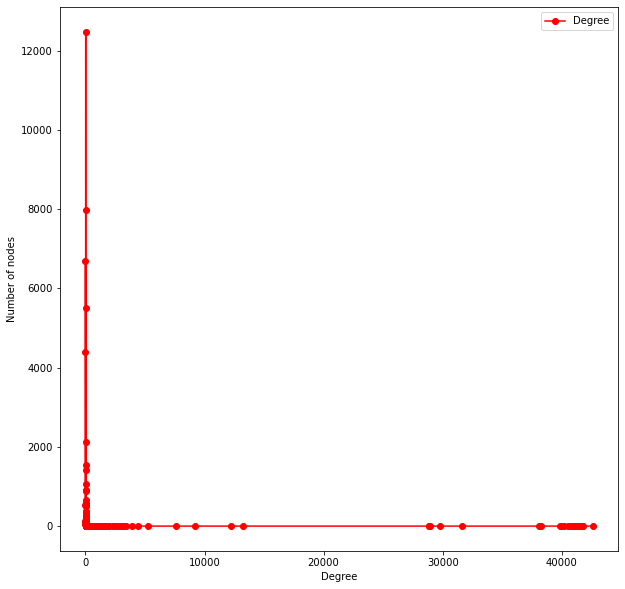

In [12]:
degree = dict(G.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]
plt.figure(figsize=(10, 10))
plt.plot(degree_values, hist, 'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

In [21]:
# user to user graph, where channels are edges
def static_graph_builder_user_to_user(path_):
    G = nx.MultiGraph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        for i in loaded:
            G.add_nodes_from(i['members'])
            for j in i['members']:
                for k in i['members']:
                    if j != k:
                        G.add_edge(j, k)
    return G

In [ ]:
G_us = static_graph_builder_user_to_user('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [ ]:
nx.info(G_us)

In [13]:
# channel to channel graph, where common users are edges
def static_graph_builder_channel_to_channel(path_):
    G = nx.MultiGraph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())        
        for i in loaded:
            G.add_node(i['name'])
            for j in loaded:
                G.add_node(j['name'])
                if i != j:
                    s = set(i['members'])
                    s.update(set(j['members']))
                    for k in s:
                        G.add_edge(i['name'], j['name'], k)
    return G

In [ ]:
G_ch = static_graph_builder_channel_to_channel('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [18]:
# channel to channel weighted graph, where common users are edges. With loops
def static_graph_weighted(path_):
    G = nx.Graph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())        
        for i in loaded:
            G.add_node(i['name'])
            for j in loaded:
                G.add_node(j['name'])
                if i != j:
                    s = set(i['members'])
                    s.update(set(j['members']))
                    G.add_edge(i['name'], j['name'], weight=len(s))
    return G

In [20]:
G_w = static_graph_weighted('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [21]:
nx.info(G_w)

'Name: \nType: Graph\nNumber of nodes: 366\nNumber of edges: 66795\nAverage degree: 365.0000'

In [13]:
# weighted links between channels
from itertools import combinations

def static_graph_weighted2(path_):
    G = nx.Graph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        namelist = [i['name'] for i in loaded]
        G.add_nodes_from(namelist)
        edgeslist = [items for items in combinations(namelist, r=2)]
        for j in edgeslist:
            s = set()
            for i in loaded:
                if i['name'] == j[0] or i['name'] == j[1]:
                    s.update(i['members'])            
            if s:
                G.add_edge(j[0], j[1], weight=len(s))
    return G

In [25]:
# channels by users
def channel_fullness(path_):
    chF = {}
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        chF = {i['name']: len(i['members']) for i in loaded}
    return chF

In [16]:
G_w2 = static_graph_weighted2('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [17]:
nx.info(G_w2)

'Name: \nType: Graph\nNumber of nodes: 366\nNumber of edges: 65805\nAverage degree: 359.5902'

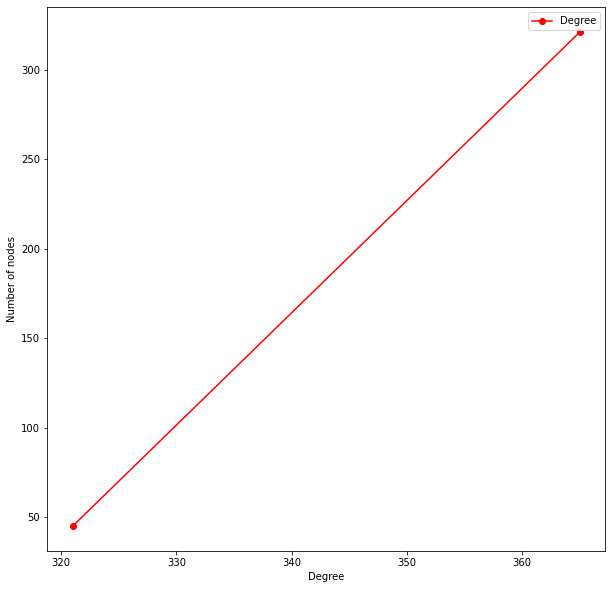

In [18]:
degree = dict(G_w2.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]
plt.figure(figsize=(10, 10))
plt.plot(degree_values, hist, 'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

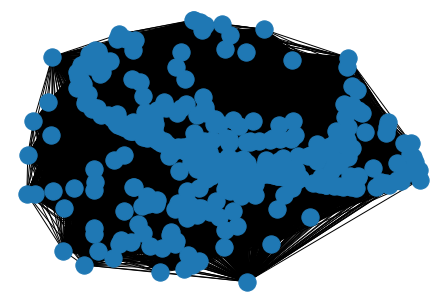

In [19]:
nx.draw(G_w2)

In [20]:
pr = nx.pagerank(G_w2)

In [21]:
pr

{'_general': 0.01916462855494472,
 '_random_talks': 0.0036510683610275507,
 'kaggle_crackers': 0.018491293955166126,
 'lang_r': 0.0173808587610939,
 '_meetings': 0.01855106768689426,
 'proj_dota2': 0.0015931431842375458,
 'lang_python': 0.018478498101845736,
 'lang_javascript': 0.0016090936381270553,
 'devops': 0.0020852196644073656,
 'visualization': 0.018414801313411222,
 'theory_and_practice': 0.018703207220355022,
 'deep_learning': 0.01880552059523921,
 '_jobs': 0.018791416740281938,
 'edu_courses': 0.018581665668234524,
 'gis': 0.0017604414909336708,
 'conference': 0.0021535243450653916,
 'nlp': 0.018150666822570223,
 'interesting_links': 0.01868074768808963,
 'deephack': 0.0017933207487344986,
 'network_analysis': 0.0018752282626369383,
 'big_data': 0.01729779643002541,
 '_random_politics': 0.0016998347560959316,
 'data_fest': 0.0024901956387156517,
 'ods_platform': 0.0015805855976449008,
 'z_bots': 0.0015422951201691534,
 'business': 0.0022651931619431125,
 '_meetings_spb': 0.00

In [22]:
pr_sorted = sorted(pr, key=pr.get, reverse=True)

In [23]:
pr_sorted

['_general',
 'mlcourse_ai_news',
 'deep_learning',
 '_jobs',
 'theory_and_practice',
 'interesting_links',
 'edu_courses',
 '_meetings',
 'kaggle_crackers',
 'lang_python',
 'datasets',
 'visualization',
 'welcome',
 'nlp',
 'mltrainings_live',
 'mltrainings_beginners',
 'lang_r',
 'big_data',
 'mlcourse_ai',
 '_top_jobs',
 '_top_science',
 '_top_talks',
 '_top_events',
 'mlcourse_ai_rus',
 'article_essence',
 'analytiсs',
 'career',
 '_random_talks',
 '_call_4_collaboration',
 'edu_books',
 '_jobs_hr',
 'looking_for_a_job',
 'gnomiki',
 'cv',
 'ods_resume_mastering',
 'class_cs231n',
 'hardware',
 'data_fest',
 'dlcourse_ai',
 'ml_pipeline',
 'class_dl_cmu',
 'reinforcement_learning',
 'ods_pet_projects',
 'business',
 'edu_academy',
 'ml4sg',
 'math',
 'trading',
 'recommender_systems',
 'ods_mentoring',
 'conference',
 'show_your_work',
 'sequences_series',
 'devops',
 '_meetings_spb',
 '_jobs_academy_phd',
 'bayesian',
 'edu_shad_exams',
 'coronavirus',
 'ods_sport',
 'audio_and_s

In [26]:
# channels by users
chF = channel_fullness('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [28]:
chF_sorted = sorted(chF, key=pr.get, reverse=True)

In [29]:
chF_sorted

['_general',
 'mlcourse_ai_news',
 'deep_learning',
 '_jobs',
 'theory_and_practice',
 'interesting_links',
 'edu_courses',
 '_meetings',
 'kaggle_crackers',
 'lang_python',
 'datasets',
 'visualization',
 'welcome',
 'nlp',
 'mltrainings_live',
 'mltrainings_beginners',
 'lang_r',
 'big_data',
 'mlcourse_ai',
 '_top_jobs',
 '_top_science',
 '_top_talks',
 '_top_events',
 'mlcourse_ai_rus',
 'article_essence',
 'analytiсs',
 'career',
 '_random_talks',
 '_call_4_collaboration',
 'edu_books',
 '_jobs_hr',
 'looking_for_a_job',
 'gnomiki',
 'cv',
 'ods_resume_mastering',
 'class_cs231n',
 'hardware',
 'data_fest',
 'dlcourse_ai',
 'ml_pipeline',
 'class_dl_cmu',
 'reinforcement_learning',
 'ods_pet_projects',
 'business',
 'edu_academy',
 'ml4sg',
 'math',
 'trading',
 'recommender_systems',
 'ods_mentoring',
 'conference',
 'show_your_work',
 'sequences_series',
 'devops',
 '_meetings_spb',
 '_jobs_academy_phd',
 'bayesian',
 'edu_shad_exams',
 'coronavirus',
 'ods_sport',
 'audio_and_s

In [31]:
import functools
functools.reduce(lambda x, y : x and y, map(lambda p, q: p == q, chF_sorted, pr_sorted), True)

True

## Number of unic event

In [34]:
path_ = 'data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020'
_s_set = set()

In [57]:
def unic_counter(path_, _s_set):
    count = 0
    event = 0
    ts = []
    names = os.listdir(path_)
    s_path = os.path.realpath(path_)
    for name in names:
        fullpath = os.path.join(s_path, name)
        if os.path.isdir(fullpath):
            inside = os.listdir(fullpath)
            for i in inside:
                inpath = os.path.join(fullpath, i)
                if os.path.splitext(inpath)[1] == '.json':
                    with open(inpath, 'r') as file_open:
                        loaded = json.loads(file_open.read())
                        for i in loaded:
                            _s_set.update(i.keys())
                            if i['type'] == 'message':
                                event +=1
                                ts.append(i['ts'])
                        count += 1
    return _s_set, count, event, ts

In [58]:
s, count, event, ts = unic_counter(path_, _s_set)

In [59]:
s

{'attachments',
 'blocks',
 'bot_id',
 'bot_link',
 'bot_profile',
 'channel',
 'client_msg_id',
 'comment',
 'display_as_bot',
 'edited',
 'file',
 'files',
 'hidden',
 'icons',
 'inviter',
 'is_intro',
 'item',
 'item_type',
 'last_read',
 'latest_reply',
 'name',
 'new_broadcast',
 'no_notifications',
 'old_name',
 'parent_user_id',
 'permalink',
 'purpose',
 'reactions',
 'replies',
 'reply_count',
 'reply_users',
 'reply_users_count',
 'room',
 'root',
 'source_team',
 'subscribed',
 'subtype',
 'team',
 'text',
 'thread_ts',
 'topic',
 'ts',
 'type',
 'upload',
 'upload_reply_to',
 'user',
 'user_profile',
 'user_team',
 'username',
 'x_files'}

In [60]:
print('Number of files: {}, number of message events: {}'.format(count, event))

Number of files: 85424, number of message events: 1850209


Итого у нас:

- **366** каналов
- **54679** юзеров
- **1850209** событий, созданных юзерами в каналах

# Event distribution

In [61]:
len(ts)

1850209

In [62]:
ts[0]

'1565029341.016700'

In [65]:
import time
from datetime import datetime
time.time()

1612294846.7218182

In [66]:
datetime.fromtimestamp(time.time())

datetime.datetime(2021, 2, 2, 21, 40, 48, 629529)

In [68]:
datetime.fromtimestamp(float(ts[0]))

datetime.datetime(2019, 8, 5, 20, 22, 21, 16700)

In [69]:
dt = [datetime.fromtimestamp(float(i)) for i in ts]

In [70]:
import matplotlib.dates as mdates

In [71]:
mpl_dt = mdates.date2num(dt)

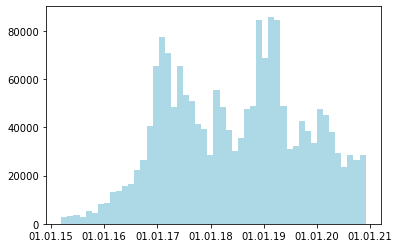

In [72]:
fig, ax = plt.subplots(1,1)
ax.hist(mpl_dt, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

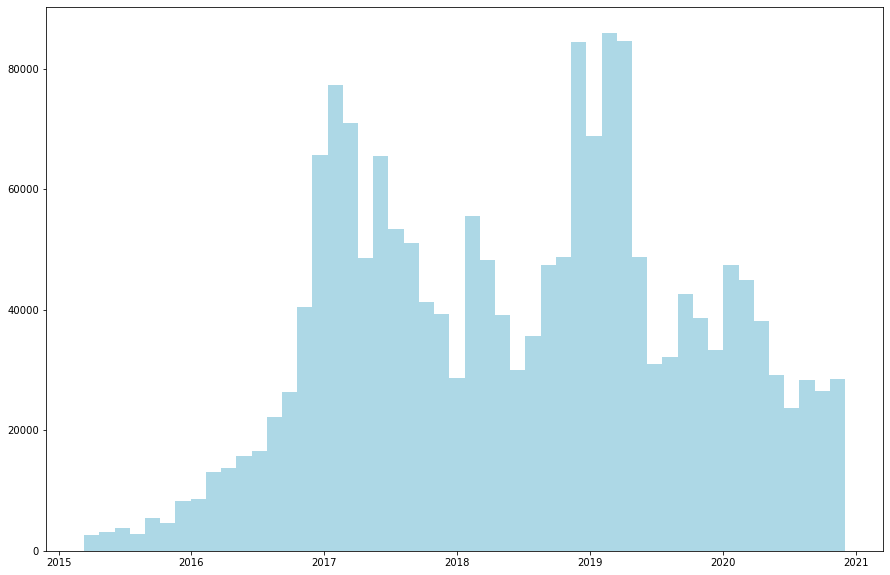

In [80]:
locator = mdates.AutoDateLocator()
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.hist(mpl_dt, bins=50, color='lightblue')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
plt.show()

TO-DO: split events:

- by days
- by fixed numbers of events in time period